In [3]:
import nltk
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [15, 15]

In [4]:

# Open the file with character names
with open('characters.txt', 'r', encoding='utf-8') as f:
    characters = [line.lower().strip().split(',') for line in f]

# Initialize a graph
G = nx.Graph()

# Add nodes to the graph
for character_list in characters:
    G.add_node(character_list[0])

# Open the second file
with open('count_of_monte_cristo.txt', 'r', encoding='utf-8') as f:
    # Read the entire file content
    text = f.read().lower()

# Tokenize the text into sentences
sentences = nltk.sent_tokenize(text)


# For each sentence, check if any of the aliases are in the sentence
for sentence in sentences:
    # Find all characters present in the sentence
    characters_in_sentence = [character_list[0] for character_list in characters if any(alias in sentence for alias in character_list)]
    # Add edges between all pairs of characters in the sentence
    for i in range(len(characters_in_sentence)):
        for j in range(i+1, len(characters_in_sentence)):
            if characters_in_sentence[i] != characters_in_sentence[j]:  # Check if the characters are different
                if G.has_edge(characters_in_sentence[i], characters_in_sentence[j]):
                    # if the edge already exists, increment the weight
                    G[characters_in_sentence[i]][characters_in_sentence[j]]['weight'] += 1
                else:
                    # else, create the edge with weight 1
                    G.add_edge(characters_in_sentence[i], characters_in_sentence[j], weight=1)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\Tuomas/nltk_data'
    - 'c:\\Python312\\nltk_data'
    - 'c:\\Python312\\share\\nltk_data'
    - 'c:\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\Tuomas\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


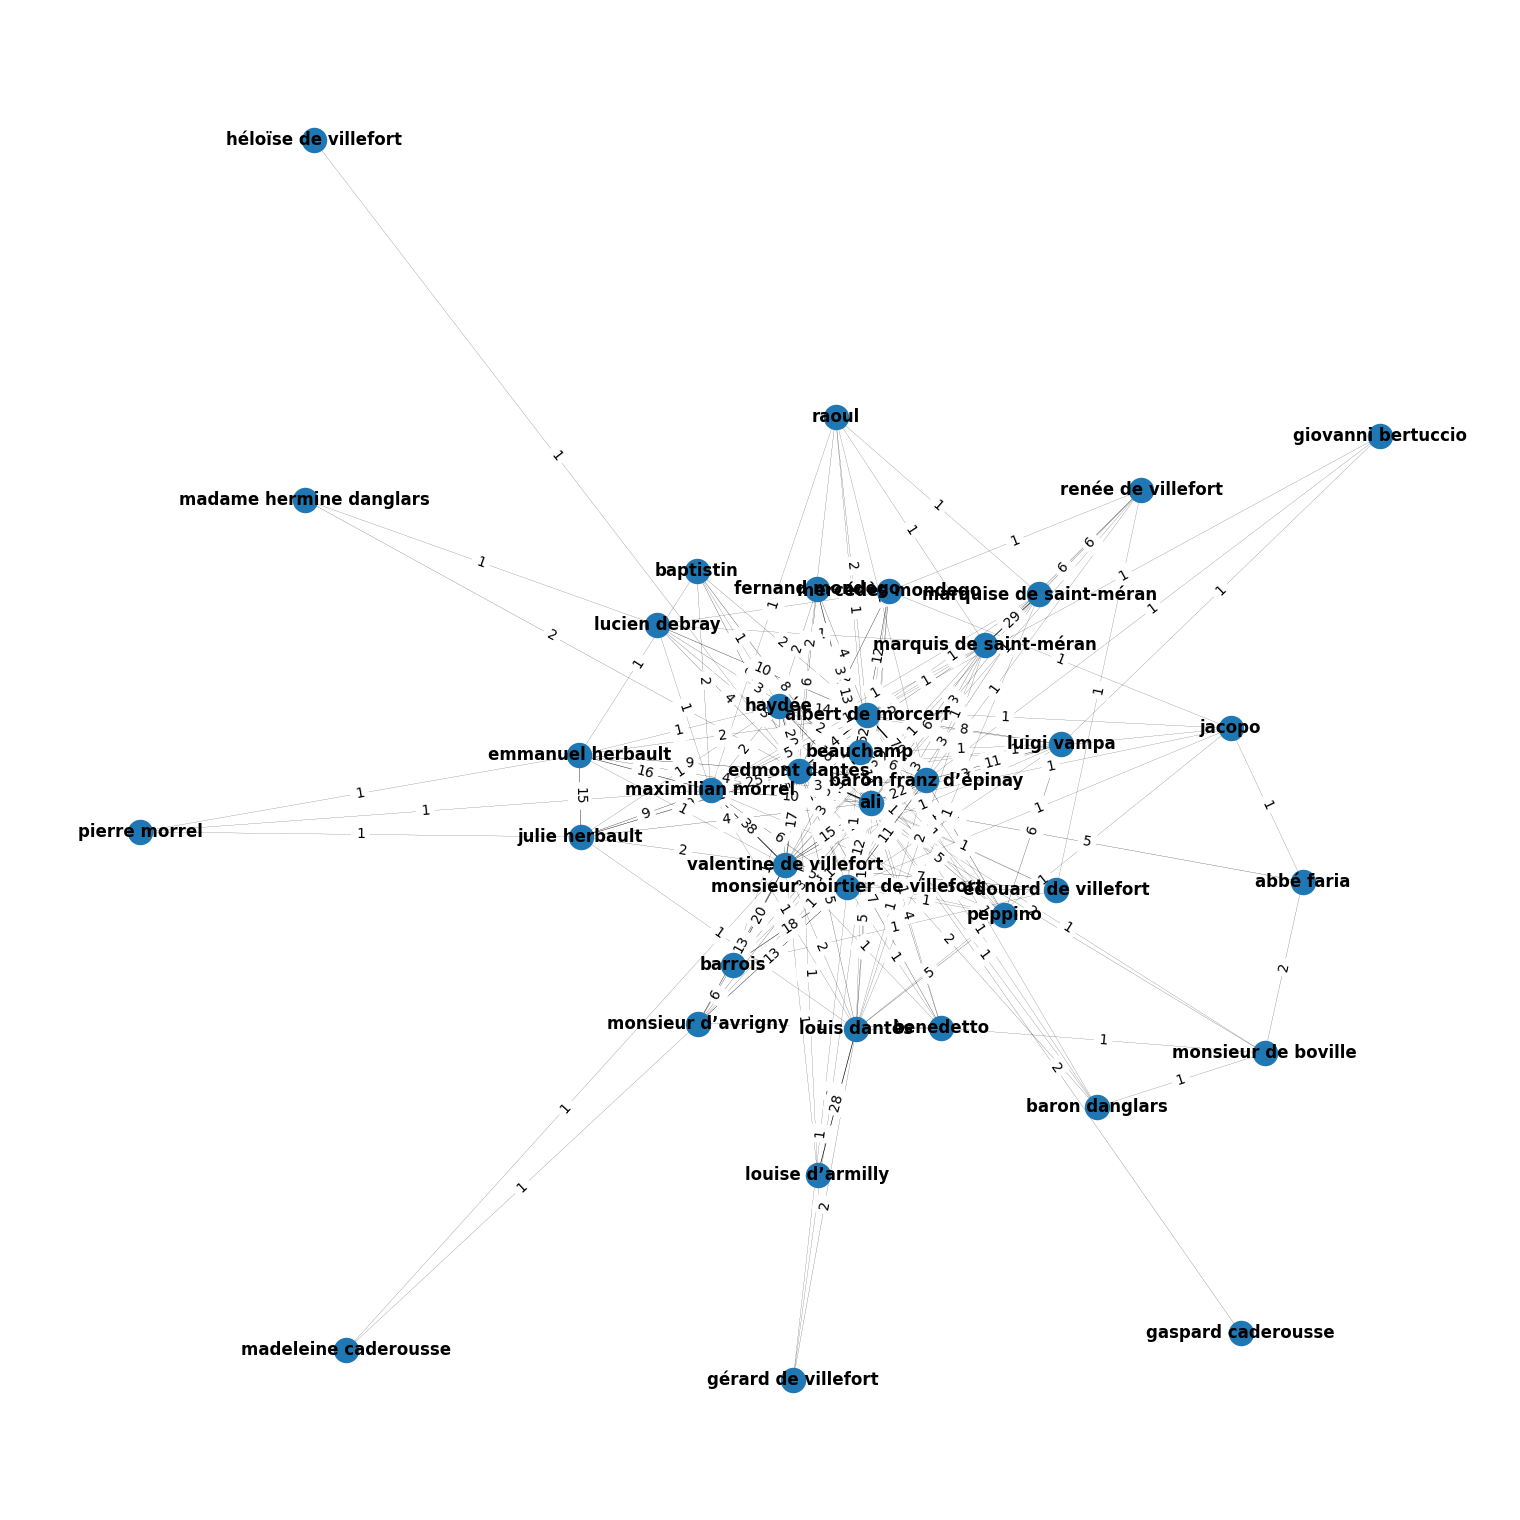

In [3]:
# Calculate the maximum weight
max_weight = max(G[u][v]['weight'] for u, v in G.edges())

# Normalize the weights to the range [0.1, 1] for visualization
edge_widths = [0.1 + 0.9 * (G[u][v]['weight'] / max_weight) for u, v in G.edges()]

# Generate the layout and draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, width=edge_widths, font_weight='bold')

# Draw edge labels
edge_labels = {(u, v): G[u][v]['weight'] for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

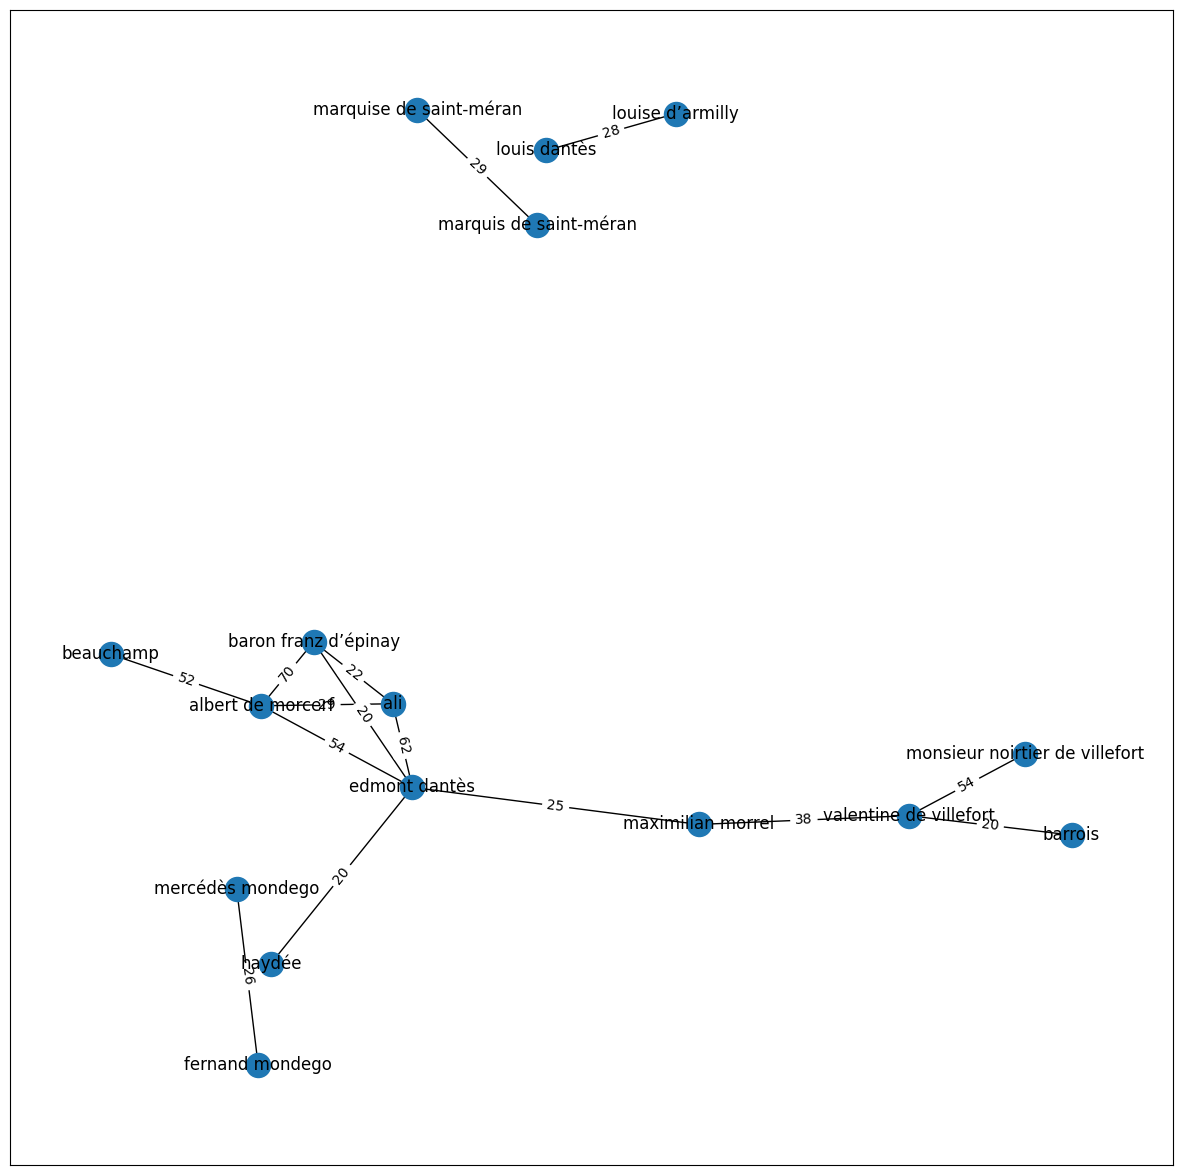

In [4]:
# Graph of edges with weights >= 20 to better visualize the strong connections of the graph

edges2 = []

for key in edge_labels.keys():
    if (edge_labels[key] >= 20):
        edges2.append(key)

G_big_edges = G.edge_subgraph(edges=edges2)

pos = nx.spring_layout(G_big_edges, k=7/np.sqrt(len(G_big_edges.nodes())))


nx.draw_networkx(G_big_edges, pos)

edge_labels2 = {(u, v): G_big_edges[u][v]['weight'] for u, v in G_big_edges.edges()}
nx.draw_networkx_edge_labels(G_big_edges, pos, edge_labels=edge_labels2)

plt.show()


3. Write a script that uses NetworkX functions to calculate the diameter, global clustering
coefficient, average distance in the graph, smallest and largest component.

In [10]:
diameter = nx.diameter(G)
print(diameter)

components = nx.connected_components(G)
for component in components:
    print(component)
    # only 1 connected component
    
average_distance = nx.average_shortest_path_length(G)
print(average_distance)

# Missing the global clustering since no direct function for this using proper algortihm 



3
{'baron danglars', 'héloïse de villefort', 'renée de villefort', 'ali', 'luigi vampa', 'emmanuel herbault', 'valentine de villefort', 'pierre morrel', 'marquis de saint-méran', 'benedetto', 'giovanni bertuccio', 'gérard de villefort', 'gaspard caderousse', 'abbé faria', 'baron franz d’épinay', 'marquise de saint-méran', 'beauchamp', 'madame hermine danglars', 'louis dantès', 'lucien debray', 'albert de morcerf', 'barrois', 'maximilian morrel', 'julie herbault', 'jacopo', 'haydée', 'fernand mondego', 'peppino', 'monsieur de boville', 'raoul', 'louise d’armilly', 'madeleine caderousse', 'baptistin', 'édouard de villefort', 'monsieur d’avrigny', 'monsieur noirtier de villefort', 'mercédès mondego', 'edmont dantès'}
1.8349928876244666


4. Suggest a script that uses NetworkX functions to identify the nodes (characters) of the three
highest degree centrality, three highest closeness centrality and three highest betweenness
centrality.

In [22]:
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

max_degree_centrality = sorted(degree_centrality, key=degree_centrality.get)[-3:]
print(max_degree_centrality)
max_closeness_centrality = sorted(closeness_centrality, key=closeness_centrality.get)[-3:]
print(max_closeness_centrality)
max_betweenness_centrality = sorted(betweenness_centrality, key=betweenness_centrality.get)[-3:]
print(max_betweenness_centrality)

# same top 3 for all:
#1 ali
#2 edmont dantès
#3 valentine de villefort


['valentine de villefort', 'edmont dantès', 'ali']
['valentine de villefort', 'edmont dantès', 'ali']
['valentine de villefort', 'edmont dantès', 'ali']


5. Write a script that plots the degree centrality distribution, closeness centrality distribution
and betweenness centrality distribution.


6. We want to test the extent to which the centrality distributions in 3) fit a power law
distribution. You may inspire from the implementation in powerlaw · PyPI of the power-law
distribution, or can use alternative one of your choice. It is important to quantify the
goodness of fit using p-value. Typically, when p-value is greater than 10%, we can state that
power-law is a plausible fit to the (distribution) data.
7. We want to use exponentially truncated power-law instead of power law distribution.
Suggest a script that quantifies the goodness of fit for degree-centrality, closeness centrality
and betweenness centrality distributions.
8. We want to identify relevant communities from the network graph. For this purpose, use
Louvain algorithm implementation in NetworkX to identify the main communities. Write a
script that uses different color for each community and visualize the above graph with the
detected communities. Use the appropriate function in NetworkX to compute the separation
among the various communities and any other related quality measures. Comment on the
quality of the partition by taking into account your own knowledge of the Novel book.
9. We want to ignore the weighting imposed by the network, and we want to restrict to binary
representation (either weight value 1 if there is cooccurrence of characters, zero otherwise).
Provide the new adjacency matrix and save it in a file. Repeat questions 3-8) using the new
adjacency matrix, and comment on the differences between the two cases (weighted and
unweighted graph) accordingly.
10. We want to approximate the real graph in 1) by a random graph, by looking into the order
of magnitude of average clustering coefficient and diameter, comment whether Erdös-Renyi
random graph or small-world model is more suitable to approximate this real graph. Write a
script that calculates the average clustering coefficient and diameter for various values of
probabilities p from 0.1 till 0.9, and identify the value of p that best matches with average
clustering coefficient and diameter of the real graph.
11. Suggest appropriate literature to comment on the various findings and explore the limitation
of the reasoning pipeline.